In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
udaje_atleti = pd.read_csv('athlete_events.csv')
regiony = pd.read_csv('noc_regions.csv')

In [3]:
data = pd.merge(udaje_atleti, regiony, on='NOC', how='left')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Potrebujeme vymazat riadky s hodnotami null v stlpcoch "age", "height", "weight". 

In [5]:
data = data.dropna(axis=0, subset=['Age', 'Height', 'Weight', 'Year'])

Rovnako vymazeme stlpec notes, ktory je nepotrebny.

In [6]:
data = data.drop(['notes'], axis=1)

In [7]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992.0,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


Este si pre istotu mozeme skontrolovat ci uz sa v nasom datasete nenachadzaju ziadne hodnoty null v stlpcoch "age", "height", "weight", "region". 

In [8]:
pd.isnull(data).sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     107464
region       138
dtype: int64

Vytvorime stlpec "haveMedal" kde zapiseme, ci sportovec ziskal alebo neziskal nejaku medailu

In [9]:
data['haveMedal'] = np.where(data['Medal'].isnull(), 0, 1)

Zmenime pohlavie na 0 a 1

In [10]:
data['SexInt'] = data['Sex']
data['SexInt'].replace({'F':0,'M':1},inplace=True)

In [11]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,haveMedal,SexInt
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,1
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992.0,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0,0


Data mame ocistene, mozeme si ich trosku priblizit:

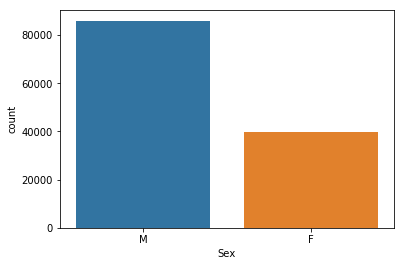

In [12]:
sns.countplot(x="Sex", data=data);

Ako vidime, muzov je viac ako dvakrat tolko ako zien.
Dalej mozme skusit, ci vek ovplyvnuje sancu na zisk medaily (je to zrejme, ale mozme si to overit na nasich datach)

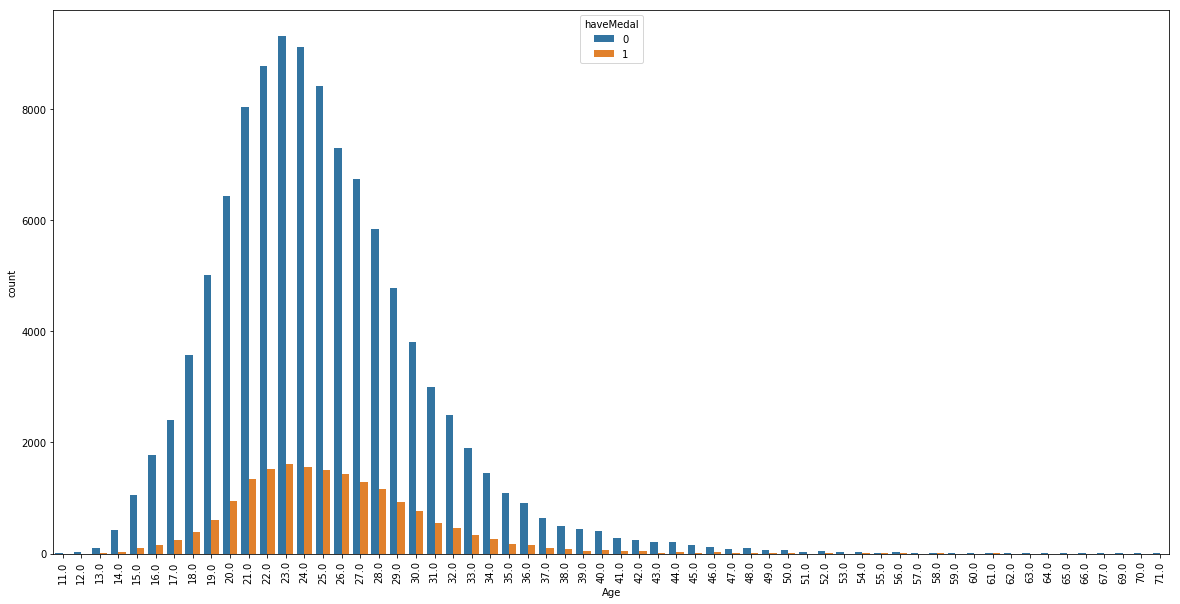

In [13]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.xticks(plt.xticks()[0], rotation=90)
sns.countplot(x='Age', hue='haveMedal', data=data)

Ako vidime, tak vek skutocne ovplyvnuje sancu na zisk medaily. Este to mozme skusit pre vysku a vahu, a potom sa konecne pustime do nasho keras modelu

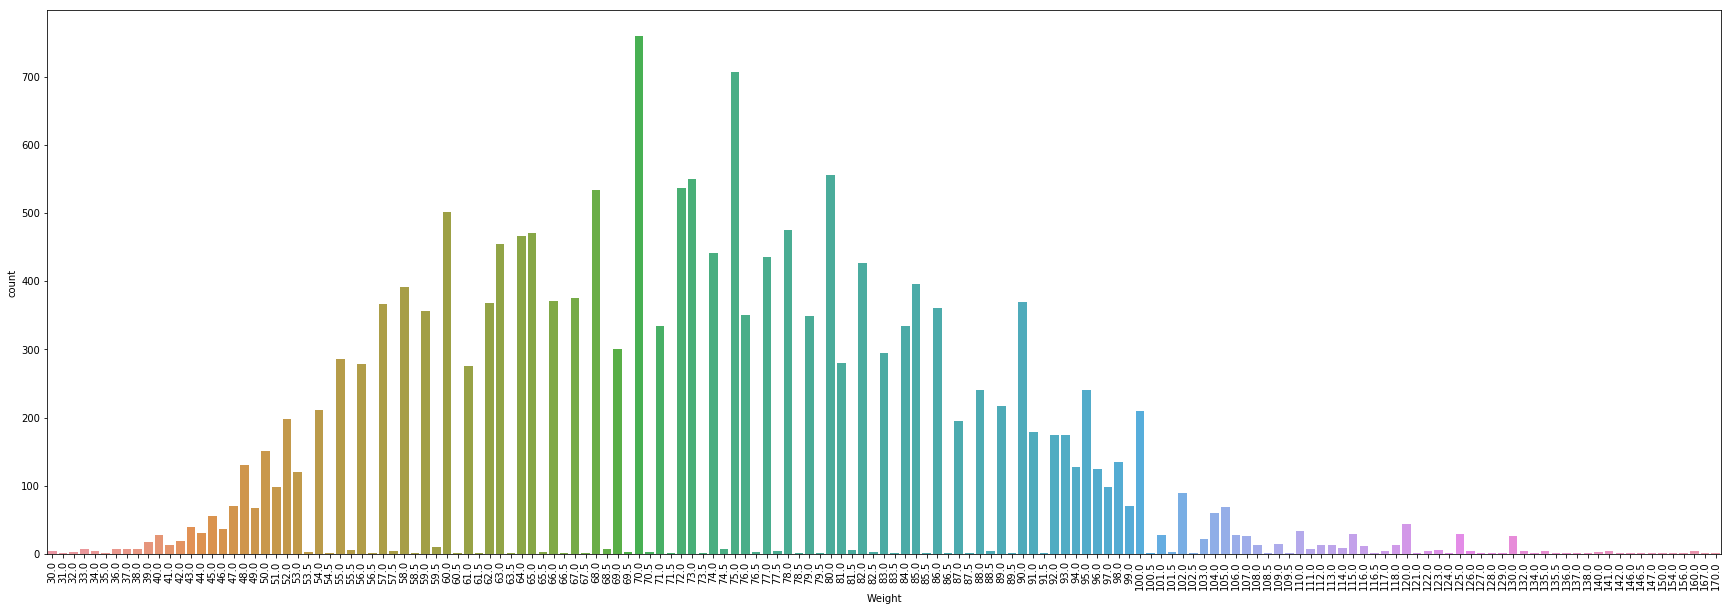

In [14]:
weight = data[data['haveMedal']==1]
plt.figure(figsize=(30, 10))
plt.tight_layout()
plt.xticks(plt.xticks()[0], rotation=90)
sns.countplot(x='Weight', data=weight)

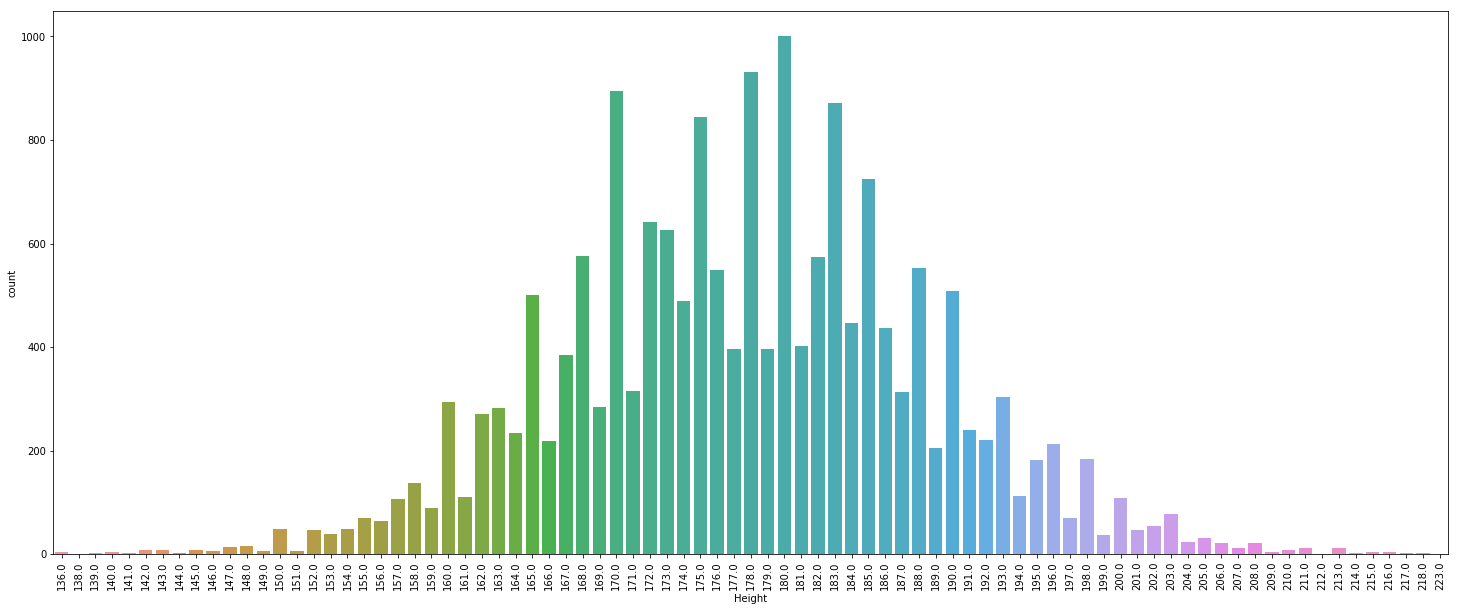

In [15]:
weight = data[data['haveMedal']==1]
plt.figure(figsize=(25, 10))
plt.tight_layout()
plt.xticks(plt.xticks()[0], rotation=90)
sns.countplot(x='Height', data=weight)

In [16]:
X = data.iloc[:,np.r_[3:6,9,17]]
y = data.iloc[:,16]

In [17]:
data[data['Weight']>169].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,haveMedal,SexInt
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008.0,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,Guam,0,1
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Heavyweight,NaN,Guam,0,1
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,1,1
39182,20144,Andrey Ivanovich Chemerkin,M,28.0,183.0,170.0,Russia,RUS,2000 Summer,2000.0,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Bronze,Russia,1,1
75031,38075,Marek Galiski,M,29.0,200.0,190.0,Poland,POL,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN,Poland,0,1


In [18]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=1000)
scores=model.evaluate(X_train,y_train)

Train on 100396 samples, validate on 25099 samples
Epoch 1/15
100396/100396 [==============================] - 2s 22us/step - loss: 0.8819 - accuracy: 0.8332 - val_loss: 0.4157 - val_accuracy: 0.8551
Epoch 2/15
100396/100396 [==============================] - 1s 9us/step - loss: 0.4120 - accuracy: 0.8566 - val_loss: 0.4146 - val_accuracy: 0.8551
Epoch 3/15
100396/100396 [==============================] - 1s 9us/step - loss: 0.4115 - accuracy: 0.8566 - val_loss: 0.4146 - val_accuracy: 0.8551
Epoch 4/15
100396/100396 [==============================] - 1s 8us/step - loss: 0.4117 - accuracy: 0.8566 - val_loss: 0.4149 - val_accuracy: 0.8551
Epoch 5/15
100396/100396 [==============================] - 1s 9us/step - loss: 0.4118 - accuracy: 0.8566 - val_loss: 0.4141 - val_accuracy: 0.8551
Epoch 6/15
100396/100396 [==============================] - 1s 9us/step - loss: 0.4111 - accuracy: 0.8566 - val_loss: 0.4144 - val_accuracy: 0.8551
Epoch 7/15
100396/100396 [==============================] - 

In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


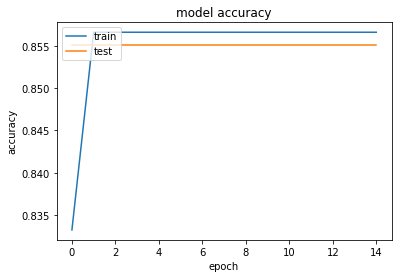

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

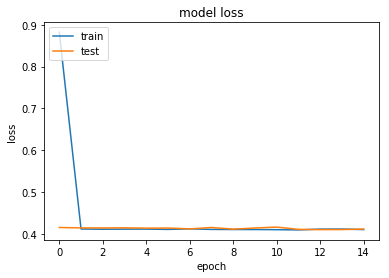

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
print("\nPresnost siete: %.2f%%"%(scores[1]*100))


Presnost siete: 85.66%
